## PARALLEL COORDINATES

### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  
 
### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook:

- Takes the Iris flower data set and creates a parallel coordinates plot 
- Reproduces the ambiguity effect for parallel coordinates 
 

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import scatter_matrix

## The Iris flower data set

The Iris flower data set or Fisher's Iris data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In [2]:
iris_data = pd.read_csv('Parallel-Coordinates_Iris-dataset.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


We create two parallel coordinates plot of Iris flower dataset. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point.

The first figure shows the normal parallel coordinates plot. In the second plot, we shift randomly the order of the axis. The visualisation changes quite when the axes are rendered.

In [4]:
# Remove the 'ID' column from Iris flower dataset
iris = iris_data.drop('Id', 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Get columns list of Iris flower dataset
cols = iris.columns.tolist()
print(cols)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [6]:
# Permute randomly the columns list of Iris flower dataset
cols_new= np.random.permutation(cols)
cols_new= cols_new.tolist()
print (cols_new)

['PetalLengthCm', 'SepalWidthCm', 'Species', 'PetalWidthCm', 'SepalLengthCm']


In [7]:
# Create a new version of Iris flower dataset with permutated columns
iris_new = iris[cols_new]
iris_new.head()

,PetalLengthCm,SepalWidthCm,Species,PetalWidthCm,SepalLengthCm
0,1.4,3.5,Iris-setosa,0.2,5.1
1,1.4,3.0,Iris-setosa,0.2,4.9
2,1.3,3.2,Iris-setosa,0.2,4.7
3,1.5,3.1,Iris-setosa,0.2,4.6
4,1.4,3.6,Iris-setosa,0.2,5.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  """
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  if __name__ == '__main__':


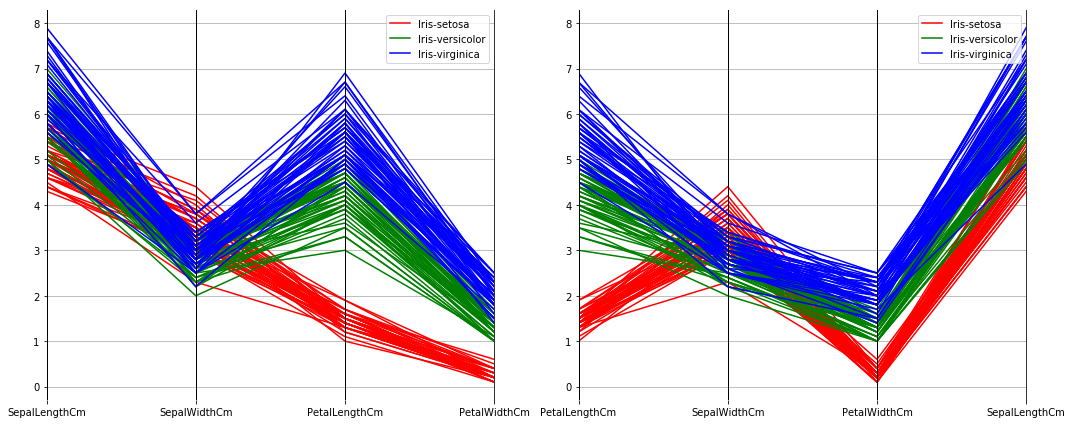

In [8]:
# Plot two parallel coordinates of Iris flower dataset with different ordering of the axis.
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
parallel_coordinates(iris, 'Species',color=['r','g','b'])


ax2= plt.subplot(122)
parallel_coordinates(iris_new, 'Species',color=['r','g','b'])


ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
#ax1.get_yaxis().tick_left() # remove unneeded ticks 

ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
#ax2.get_yaxis().tick_left() # remove unneeded ticks 

plt.tight_layout()
plt.show()

The figure below shows a scatter plot matrix of the Iris flower dataset.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


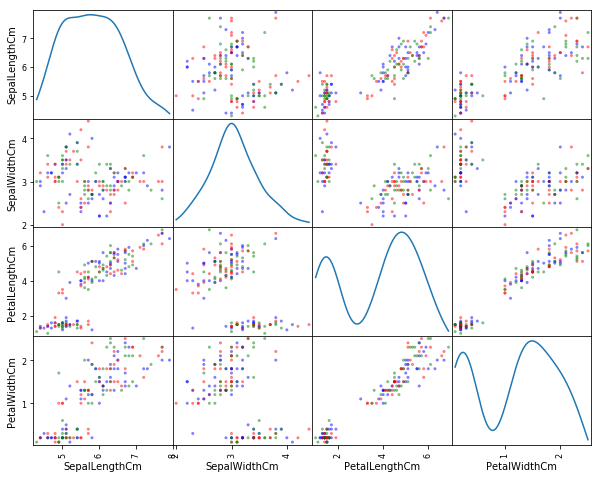

In [9]:
scatter_matrix(iris, figsize=(10, 8),c=['r','g','b'],diagonal='kde')
plt.show()

## Ambiguity effect for parallel coordinates

Figures (A) and (B) plot respectively the vectors (y1,y2) and (y3,y4) without color coding. Figures (C) and (D) are respectively the same plots than (A) and (B) but with color coding. Single color lines may yield to ambiguities.

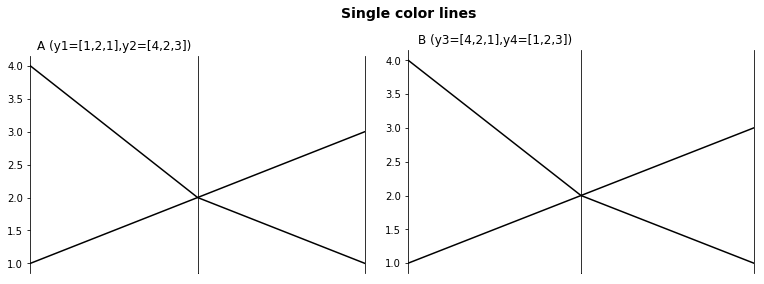

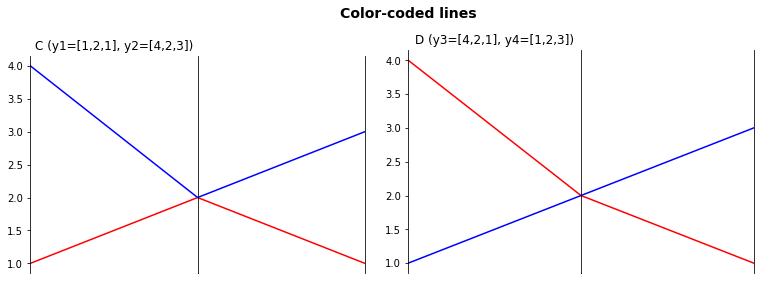

In [10]:
#vectors to plot
y1=[1,2,1]
y2=[4,2,3]
y3=[4,2,1]
y4=[1,2,3]

#spines
x=[1,2,3]

plt.figure(1)
fig,(ax1,ax2) = plt.subplots(1,2, sharey=False)
ax3 = fig.add_axes([1, 0.125, 0.4, 0.775], label='axes1')
ax4 = fig.add_axes([1.4, 0.125, 0.4, 0.775], label='axes1')


#plot vectors y1 and y2 without color coding
ax1.plot(x,y1,'black', x,y2,'black')
ax2.plot(x,y1,'black', x,y2,'black')
ax1.set_xlim([ x[0],x[1]])
ax2.set_xlim([ x[1],x[2]])
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.set_xticks([]) #Remove unneeded ticks
ax1.get_yaxis().tick_left() 
ax2.set_xticks([]) 
ax2.set_yticks([]) 
plt.subplots_adjust(wspace=0)


#plot vectors y3 and y4 withour color coding
ax3.plot(x,y3,'black', x,y4,'black')
ax4.plot(x,y3,'black', x,y4,'black')
ax3.set_xlim([ x[0],x[1]])
ax4.set_xlim([ x[1],x[2]])
ax3.spines["bottom"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax3.set_xticks([]) #Remove unneeded ticks
ax3.get_yaxis().tick_left() 
ax4.set_xticks([]) 
ax4.set_yticks([]) 

fig.suptitle('Single color lines', x=1,y=1.05,fontsize=14, fontweight='bold')
ax1.set_title("A (y1=[1,2,1],y2=[4,2,3])")
ax3.set_title("B (y3=[4,2,1],y4=[1,2,3])")

#################################################

plt.figure(2)
fig,(ax1,ax2) = plt.subplots(1,2, sharey=False)
ax3 = fig.add_axes([1, 0.125, 0.4, 0.775], label='axes1')
ax4 = fig.add_axes([1.4, 0.125, 0.4, 0.775], label='axes1')

#plot vectors y1 and y2 with color coding
ax1.plot(x,y1,'red', x,y2,'blue')
ax2.plot(x,y1,'red', x,y2,'blue')
ax1.set_xlim([ x[0],x[1]])
ax2.set_xlim([ x[1],x[2]])
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.set_xticks([]) #Remove unneeded ticks
ax1.get_yaxis().tick_left() 
ax2.set_xticks([]) 
ax2.set_yticks([]) 
plt.subplots_adjust(wspace=0)

#plot vectors y3 and y4 with color coding
ax3.plot(x,y3,'red', x,y4,'blue')
ax4.plot(x,y3,'red', x,y4,'blue')
ax3.set_xlim([ x[0],x[1]])
ax4.set_xlim([ x[1],x[2]])
ax3.spines["bottom"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax3.set_xticks([]) #Remove unneeded ticks
ax3.get_yaxis().tick_left() 
ax4.set_xticks([]) 
ax4.set_yticks([]) 

fig.suptitle('Color-coded lines', x=1,y=1.05,fontsize=14, fontweight='bold')
ax1.set_title("C (y1=[1,2,1], y2=[4,2,3])")
ax3.set_title("D (y3=[4,2,1], y4=[1,2,3])")

plt.show()